# ENTRENANDO MODELO DE ML PARA PREDECIR EL ALCANCE (VISTAS) DE VIDEOS DE YOUTUBE
# DATA SET : https://www.kaggle.com/datasets/mohamedwael001/youtube-videos-mega-dataset-40000-entries?select=40000_yt_videos.csv

# PASO 1 - INSTALAMOS E IMPORTAMOS LIBRERIAS

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set(style='whitegrid',context='notebook')

# PASO 2 CARGAMOS EL DATASET

In [31]:
df = pd.read_csv('/content/drive/MyDrive/g5_modulo9/paso2/youtube_clean_final.csv')
df

,category_id,views,likes,comments,duration_sec,subscriber_count
0,20,1409321,31517,252,697.0,1250000.0
1,28,6589901,236551,9035,667.0,16600000.0
2,25,1527301,22102,1838,293.0,9260000.0
3,22,234584,18848,1103,349.0,5550000.0
4,26,117209,2878,483,1003.0,2300000.0
...,...,...,...,...,...,...
34871,17,1823694,32486,1862,2952.0,622000.0
34872,20,2062156,72591,4720,871.0,3640000.0
34873,26,3098762,74118,2242,1216.0,2710000.0
34874,29,752768,9537,578,3880.0,17200.0


# PASO 3 - PREPROCESAMIENTO DE VARIABLES NÚMERICAS

In [32]:
df['views'] = df['views'] / 1000000
df

,category_id,views,likes,comments,duration_sec,subscriber_count
0,20,1.409321,31517,252,697.0,1250000.0
1,28,6.589901,236551,9035,667.0,16600000.0
2,25,1.527301,22102,1838,293.0,9260000.0
3,22,0.234584,18848,1103,349.0,5550000.0
4,26,0.117209,2878,483,1003.0,2300000.0
...,...,...,...,...,...,...
34871,17,1.823694,32486,1862,2952.0,622000.0
34872,20,2.062156,72591,4720,871.0,3640000.0
34873,26,3.098762,74118,2242,1216.0,2710000.0
34874,29,0.752768,9537,578,3880.0,17200.0


In [33]:
df['subscriber_count'] = df['subscriber_count'] / 1000000
df


,category_id,views,likes,comments,duration_sec,subscriber_count
0,20,1.409321,31517,252,697.0,1.2500
1,28,6.589901,236551,9035,667.0,16.6000
2,25,1.527301,22102,1838,293.0,9.2600
3,22,0.234584,18848,1103,349.0,5.5500
4,26,0.117209,2878,483,1003.0,2.3000
...,...,...,...,...,...,...
34871,17,1.823694,32486,1862,2952.0,0.6220
34872,20,2.062156,72591,4720,871.0,3.6400
34873,26,3.098762,74118,2242,1216.0,2.7100
34874,29,0.752768,9537,578,3880.0,0.0172


# PASO 4: CODIFICACIÓN DE VARIABLES CATEGORICAS CON SKLEARN

# 4.1 IDENTIFICAMOS VARIABLES CATEGORICAS

In [34]:
# Primero convertimos category_id a objeto/string porque no es un número continuo, es una etiqueta.
df['category_id'] = df['category_id'].astype(object)

# Ahora identificamos
categorical_columns = df.select_dtypes(object).columns

# Resultado esperado: Index(['category_id'], dtype='object')
categorical_columns

Index(['category_id'], dtype='object')

# 4.2 CREAMOS LISTA POR TIPO DE CODIFICACIÓN

In [35]:
# 1. Nos aseguramos de que 'category_id' sea tratada como categoría
df['category_id'] = df['category_id'].astype(object)

# 2. Identificamos las columnas categóricas actuales en df
categorical_columns = df.select_dtypes(object).columns

# 3. Ejecutamos el bucle para ver la distribución de tus datos
for cc in categorical_columns:
  print("*"*50)
  print(f"ANÁLISIS DE LA COLUMNA: {cc}")
  print(df[cc].value_counts())

**************************************************
ANÁLISIS DE LA COLUMNA: category_id
category_id
20    4153
24    4149
28    4115
27    4008
22    3077
26    2704
23    2153
15    2111
17    2054
25    1727
19    1141
29    1073
1     1066
10     792
2      553
Name: count, dtype: int64


In [36]:
onehot_cols = ['category_id']

# 4.4 CODIFICAMOS USANDO LOS MODULSO COMPOSE Y PREPROCESSING DE SKLEARN

In [37]:
import sklearn.compose
import sklearn.preprocessing

# 4.4.1 CREAMOS UN TRANSFORMER

In [38]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['category_id'])])

# 4.4.2 APLICAMOS EL TRANSFOMER A EL DATASET

In [39]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df),
        columns = transformer.get_feature_names_out(),
        index=df.index
    )
)
data_transformed_df

,onehotencoder__category_id_1,onehotencoder__category_id_2,onehotencoder__category_id_10,onehotencoder__category_id_15,onehotencoder__category_id_17,onehotencoder__category_id_19,onehotencoder__category_id_20,onehotencoder__category_id_22,onehotencoder__category_id_23,onehotencoder__category_id_24,onehotencoder__category_id_25,onehotencoder__category_id_26,onehotencoder__category_id_27,onehotencoder__category_id_28,onehotencoder__category_id_29,remainder__views,remainder__likes,remainder__comments,remainder__duration_sec,remainder__subscriber_count
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.409321,31517.0,252.0,697.0,1.2500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.589901,236551.0,9035.0,667.0,16.6000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.527301,22102.0,1838.0,293.0,9.2600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234584,18848.0,1103.0,349.0,5.5500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117209,2878.0,483.0,1003.0,2.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.823694,32486.0,1862.0,2952.0,0.6220
34872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.062156,72591.0,4720.0,871.0,3.6400
34873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.098762,74118.0,2242.0,1216.0,2.7100
34874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752768,9537.0,578.0,3880.0,0.0172


In [40]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df


,category_id_1,category_id_2,category_id_10,category_id_15,category_id_17,category_id_19,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,views,likes,comments,duration_sec,subscriber_count
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.409321,31517.0,252.0,697.0,1.2500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.589901,236551.0,9035.0,667.0,16.6000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.527301,22102.0,1838.0,293.0,9.2600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234584,18848.0,1103.0,349.0,5.5500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117209,2878.0,483.0,1003.0,2.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.823694,32486.0,1862.0,2952.0,0.6220
34872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.062156,72591.0,4720.0,871.0,3.6400
34873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.098762,74118.0,2242.0,1216.0,2.7100
34874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752768,9537.0,578.0,3880.0,0.0172


In [41]:

data_transformed_df.dtypes

,0
category_id_1,float64
category_id_2,float64
category_id_10,float64
category_id_15,float64
category_id_17,float64
category_id_19,float64
category_id_20,float64
category_id_22,float64
category_id_23,float64
category_id_24,float64


In [42]:
data_transformed_df.to_csv('youtube_transformed.csv',index=None)

In [43]:
data_transformed_df = pd.read_csv('/content/youtube_transformed.csv')
data_transformed_df

,category_id_1,category_id_2,category_id_10,category_id_15,category_id_17,category_id_19,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,views,likes,comments,duration_sec,subscriber_count
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.409321,31517.0,252.0,697.0,1.2500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.589901,236551.0,9035.0,667.0,16.6000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.527301,22102.0,1838.0,293.0,9.2600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234584,18848.0,1103.0,349.0,5.5500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117209,2878.0,483.0,1003.0,2.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.823694,32486.0,1862.0,2952.0,0.6220
34872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.062156,72591.0,4720.0,871.0,3.6400
34873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.098762,74118.0,2242.0,1216.0,2.7100
34874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752768,9537.0,578.0,3880.0,0.0172


# PASO 5 - CORRELACIONES

In [44]:
corr_matrix = data_transformed_df.corr()
corr_charges = corr_matrix['views']
corr_charges.sort_values(ascending=False)

,views
views,1.000000
likes,0.742376
comments,0.475097
subscriber_count,0.115714
category_id_1,0.092880
category_id_23,0.084917
category_id_24,0.083014
category_id_26,0.019939
category_id_10,0.010732
category_id_2,0.008233


<Axes: >

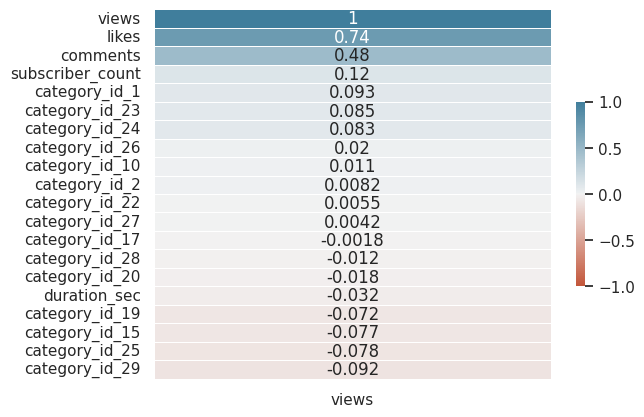

In [45]:
sns.heatmap(
    data=corr_charges.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# PASO 6 - IDENTIFICAMOS VARIABLE X y Y , dividmos en train test

In [46]:
cols = corr_charges.index.tolist()
cols.remove('views')
cols

['category_id_1',
 'category_id_2',
 'category_id_10',
 'category_id_15',
 'category_id_17',
 'category_id_19',
 'category_id_20',
 'category_id_22',
 'category_id_23',
 'category_id_24',
 'category_id_25',
 'category_id_26',
 'category_id_27',
 'category_id_28',
 'category_id_29',
 'likes',
 'comments',
 'duration_sec',
 'subscriber_count']

In [47]:
X = data_transformed_df[cols].values
y = data_transformed_df['views'].values.reshape(-1,1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

## CREAMOS UN CODIGO PARA PODER EVALUAR VARIOS MODELOS

# 1 - IMPORTAMOS LIBRERIAS

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# 2 - ESCALAMIENTO DE DATOS

In [50]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# 3 - CREAMOS DICCIONARIO DE MODELOS

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "SVR": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 4 - CREAMOS BUCLE PARA PROBAR CADA MODELO DEL DICCIONARIO

In [52]:
results = {}
for name,model in models.items():
  model.fit(X_train_scaled,y_train_scaled.ravel())
  y_pred_scaled = model.predict(X_test_scaled)

  r2 = r2_score(y_test_scaled, y_pred_scaled)
  mse = mean_squared_error(y_test_scaled, y_pred_scaled)
  mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
  results[name] = {"R2": r2, "MSE": mse, "MAE": mae}

# MOSTRAMOS RESULTADOS DE LOS MODELOS ENTRENADOS

In [53]:
results_df = pd.DataFrame(results).T
print("Model Comparison:")
display(results_df)

Model Comparison:


,R2,MSE,MAE
Linear Regression,0.573030,0.433047,0.439547
Lasso,0.545581,0.460887,0.473925
Ridge,0.573029,0.433049,0.439552
KNN Regressor,0.681966,0.322560,0.339417
SVR,0.648852,0.356147,0.346026
Random Forest Regressor,0.717604,0.286415,0.324976


# BUSCAMOS EL MEJOR MODELO

In [54]:
best_r2_model = results_df['R2'].idxmax()
best_mse_model = results_df['MSE'].idxmin()
print(f"\nBest model based on R2: {best_r2_model} (R2: {results_df.loc[best_r2_model, 'R2']:.4f})")
print(f"Best model based on MSE: {best_mse_model} (MSE: {results_df.loc[best_mse_model, 'MSE']:.2f})")



Best model based on R2: Random Forest Regressor (R2: 0.7176)
Best model based on MSE: Random Forest Regressor (MSE: 0.29)


# GRAFICAMOS RESULTADOS

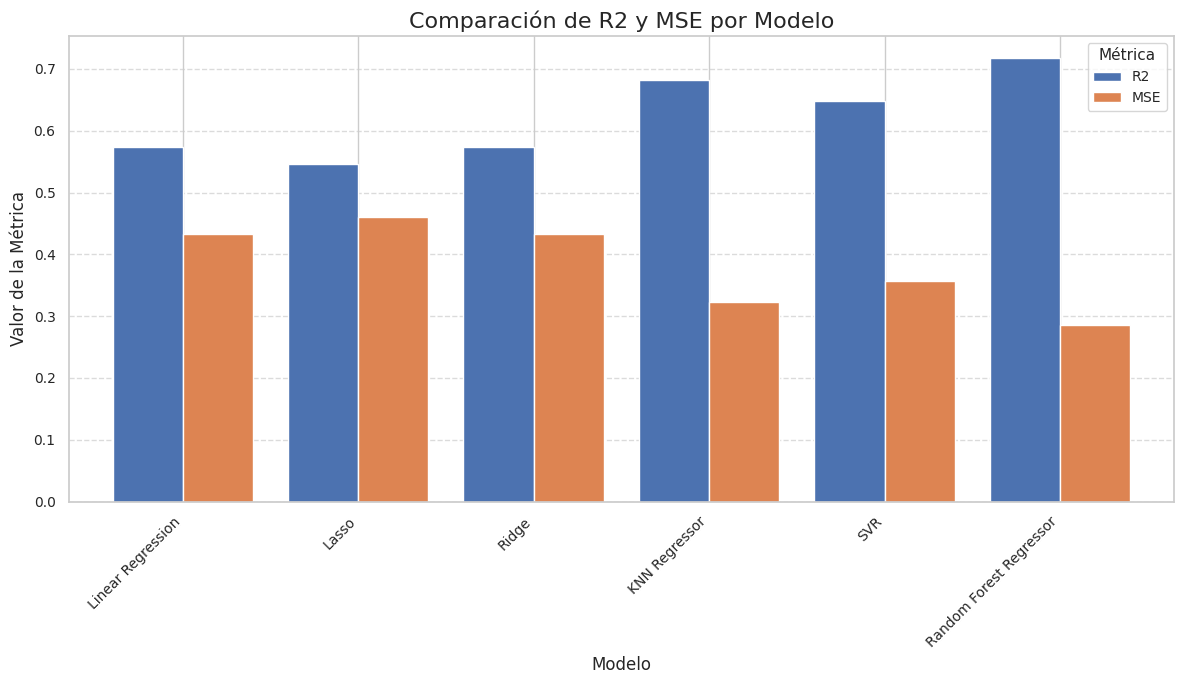

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las métricas R2 y MSE para comparar
results_to_plot = results_df[['R2', 'MSE']]

# Crear el gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 7))
results_to_plot.plot(kind='bar', ax=ax, width=0.8)

plt.title('Comparación de R2 y MSE por Modelo', fontsize=16)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrica', fontsize=10, title_fontsize='11')
plt.tight_layout()
plt.show()

In [57]:
import joblib

# 1. Obtenemos el mejor modelo del diccionario que creaste en tu ejemplo
# results_df['R2'].idxmax() te da el nombre del mejor modelo
mejor_modelo_nombre = results_df['R2'].idxmax()
final_model = models[mejor_modelo_nombre]

# 2. GENERACIÓN FÍSICA DE LOS ARCHIVOS
# Estos aparecerán en la carpeta de la izquierda de Colab
joblib.dump(final_model, 'best_youtube_model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
joblib.dump(cols, 'features_order.pkl')

print(f"✅ Archivos generados usando el modelo: {mejor_modelo_nombre}")

✅ Archivos generados usando el modelo: Random Forest Regressor
